####  DSC-630-T302
#### Chitramoy Mukherjee
#### Date : 03/28/2024
#### Week3 - Exercise 3.2 - Improve Marketing Promotion

#### Will perform the below steps on Los Angeles Dodgers' attendance dataset and make recommendations to management on how to improve attendance.

1. Will analyze the dataset and it's attributes to understand its structure, check missing values, and get an overview of the variables.
2. calculate summary statistics to understand the distribution and relationships between variables.
3. Visualize the data to identify any patterns or trends that may influence attendance.
4. Perform statistical tests to identify major factors that affects the attendance.
5. Based on our analysis, will suggest recommendations to management on how to improve attendance.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Import the dataset in pandas dataframe and Display the first few rows of the dataset.

In [65]:
df = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-630\\Week-3\\dodgers-2022.csv')
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


#### Run summary statistics, Check for missing values and identify column datatypes.

In [71]:
df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [13]:

print(df.isnull().sum())

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64


In [14]:
# describe the dataframe values
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [ ]:
#### 1. As per the above analysis of the above dataset shows that the "temp" data is normally distributed as it shows mean and 50th Percentile values are approximately same. 
#### 2. Day looks close to normal distribution. 
#### 3. "attend" looks like left skewed as mean is above 50th percentile. 

As per the datatype 3 numeric columns, day, attend and temp is presnt in the dataset.

#### Analyze the distribution of the data. 

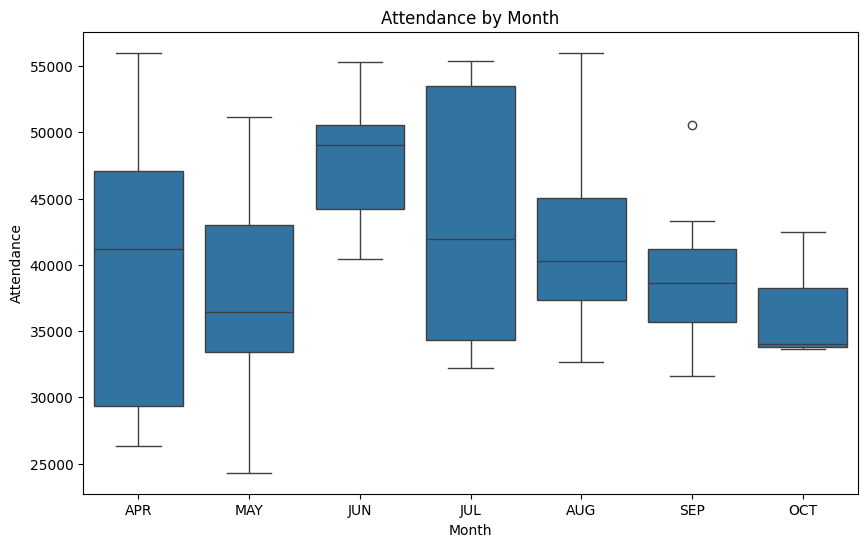

In [18]:
# Visualize attendance by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='attend', data=df)
plt.title('Attendance by Month')
plt.xlabel('Month')
plt.ylabel('Attendance')
plt.show()

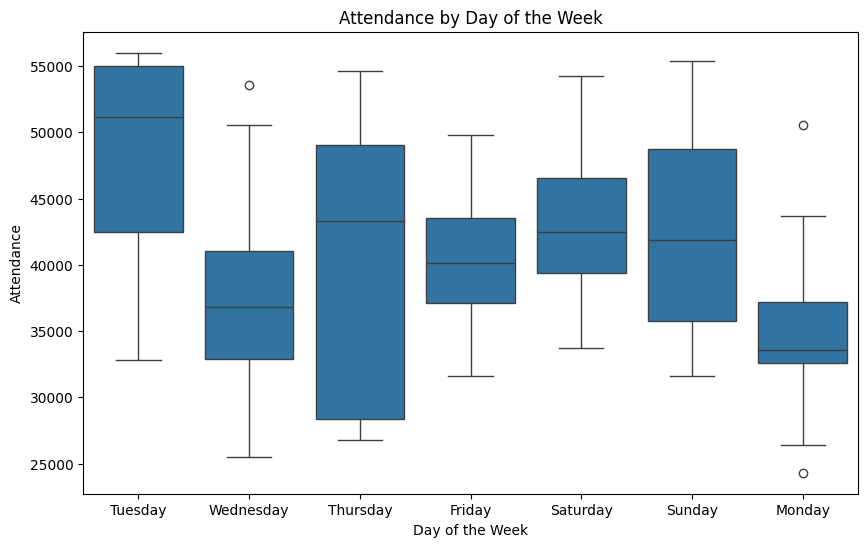

In [20]:
# Visualize attendance by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='attend', data=df)
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.show()

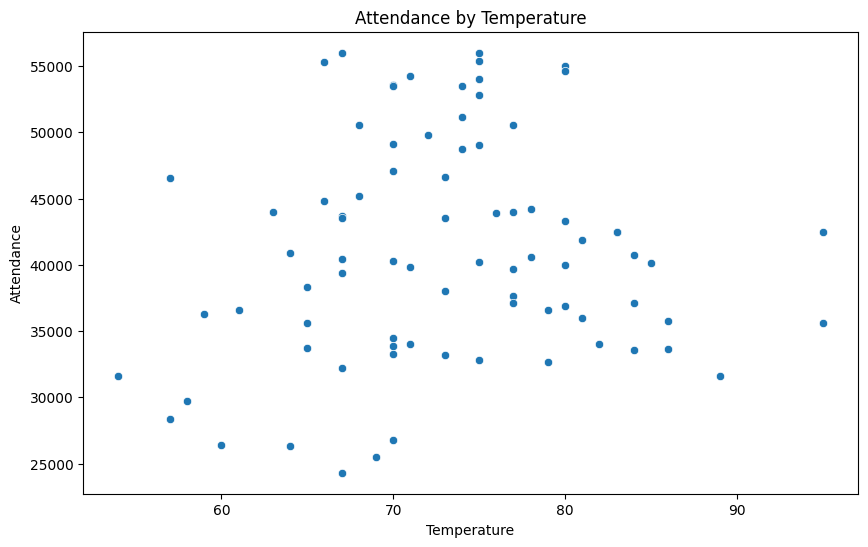

In [21]:
# Visualize attendance by temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='attend', data=df)
plt.title('Attendance by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Attendance')
plt.show()

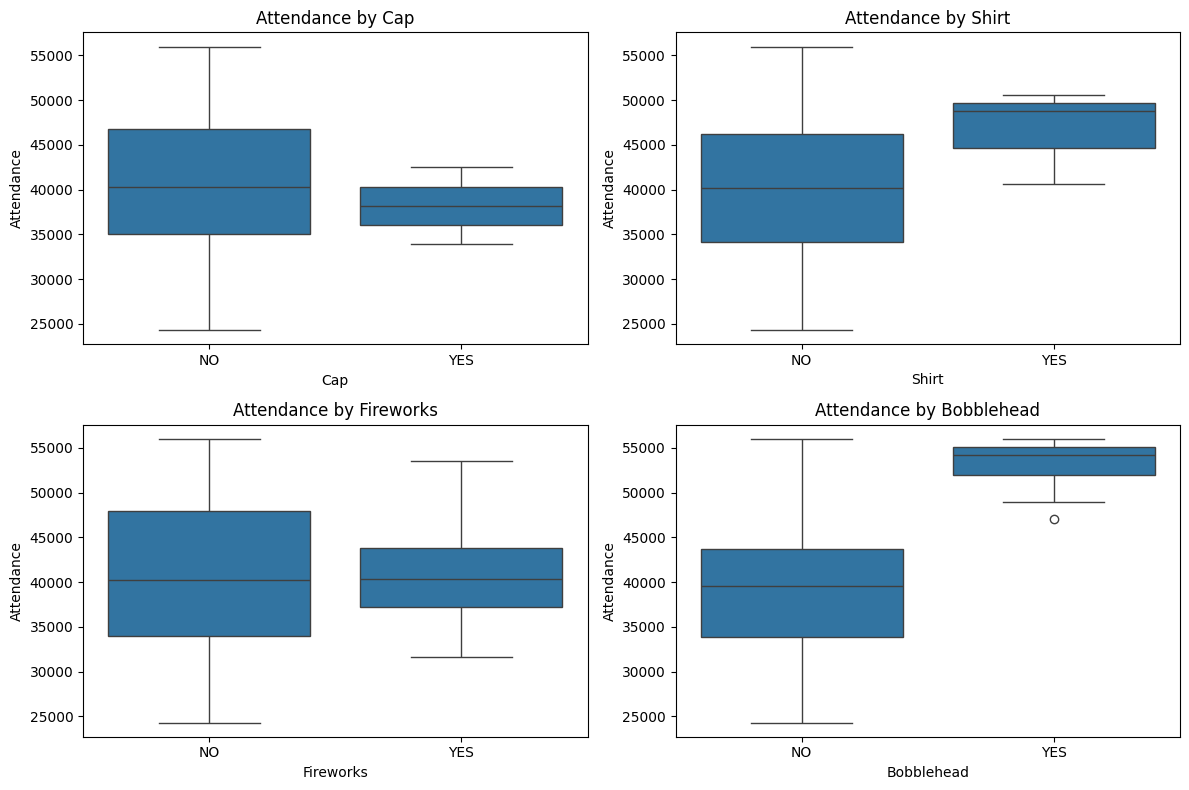

In [22]:
# Visualize attendance by promotion (cap, shirt, fireworks, bobblehead)
promotions = ['cap', 'shirt', 'fireworks', 'bobblehead']
plt.figure(figsize=(12, 8))
for i, promo in enumerate(promotions, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=promo, y='attend', data=df)
    plt.title('Attendance by ' + promo.capitalize())
    plt.xlabel(promo.capitalize())
    plt.ylabel('Attendance')
plt.tight_layout()
plt.show()

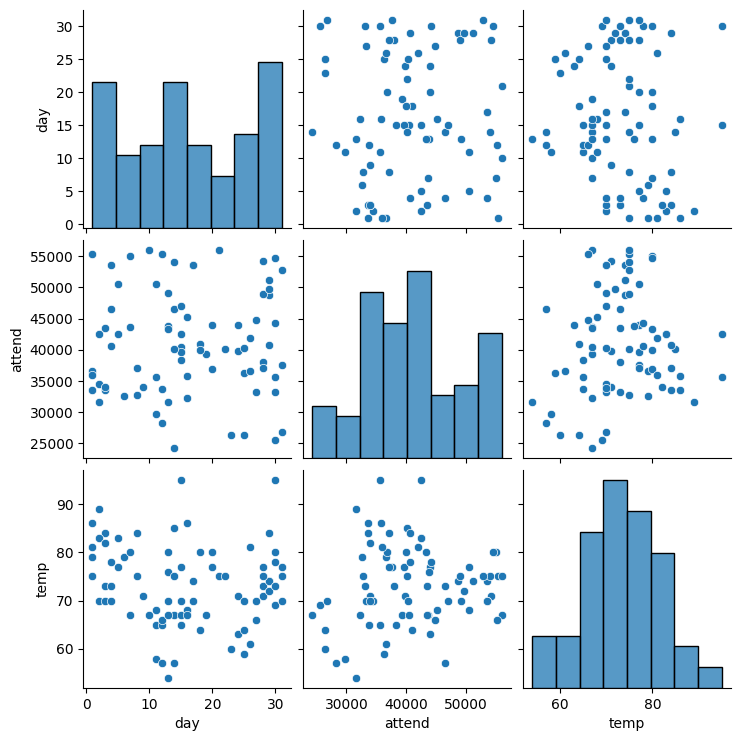

In [23]:
sns.pairplot(df)

Above pairplot is shows that there is no clear relationship bettwen the 3 variables. Lets check the correlation values. 

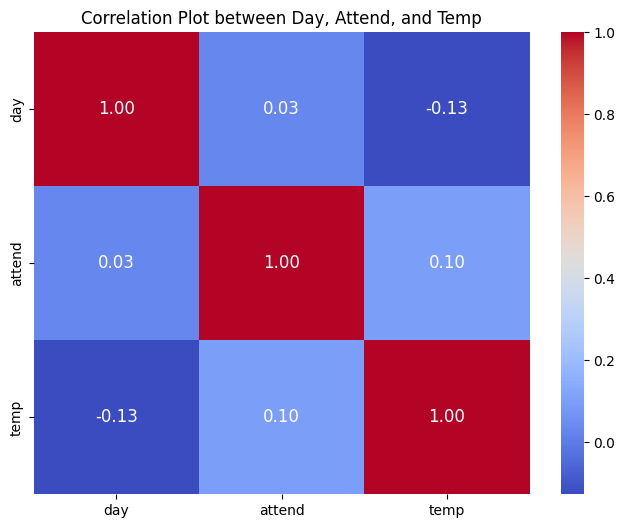

In [28]:
# Selecting only the required columns
selected_columns = ['day', 'attend', 'temp']
selected_data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Plot between Day, Attend and Temp')
plt.show()

###  heatmap showing the correlation between 'day', 'attend', and 'temp' fields. Positive correlations will appear in warmer colors (closer to 1), 
### negative correlations in cooler colors (closer to -1), and no correlation in white (close to 0).correlation matrix shows no clear relationship 
### between 3 variables.

Lets analyze which variable is best for the model, will create regression model with each variable and check the Coefficient of Determination (r-square) to determine which variable affect model most.In the current dataset attendance data is numeric, will transform it to log scale as its not normally distributed. 

#### Identify the most influential features for the model.

In [66]:
y = np.log2(dodgers_df['attend'])

In [67]:
# Creating Linear Regression model instance. 
model = LinearRegression()

In [68]:
x = df[['temp']] 
model.fit(x, y)
r_square = model.score(x, y)
print('coefficient of determination:', r_square)

coefficient of determination: 0.017205614380152223


In [69]:
x = pd.get_dummies(dodgers_df['day'], prefix='day')
model.fit(x, y)
r_square = model.score(x, y)
print('coefficient of determination:', r_square)

coefficient of determination: 0.37357390310790617


In [19]:
x = pd.get_dummies(dodgers_df['day_of_week'], prefix='day')
model.fit(x, y)
r_square = model.score(x, y)
print('coefficient of determination:', r_square)

coefficient of determination: 0.22841305012354174


In [20]:
x = pd.get_dummies(dodgers_df['day_night'], prefix='time')
model.fit(x, y)
r_square = model.score(x, y)
print('coefficient of determination:', r_square)

coefficient of determination: 0.0034086019303096737


In [21]:
x = pd.get_dummies(dodgers_df['opponent'], prefix='team')
model.fit(x, y)
r_square = model.score(x, y)
print('coefficient of determination:', r_square)

coefficient of determination: 0.27602365431296194


In [22]:
x = pd.get_dummies(dodgers_df['fireworks'], prefix='firework')
model.fit(x, y)
r_square = model.score(x, y)
print('coefficient of determination:', r_square)

coefficient of determination: 0.0008091841179477255


In [23]:
x = pd.get_dummies(dodgers_df['skies'], prefix='sky')
model.fit(x, y)
r_square = model.score(x, y)
print('coefficient of determination:', r_square)

coefficient of determination: -0.00206780452386246


In [24]:
x = pd.get_dummies(dodgers_df['bobblehead'], prefix='bh')
model.fit(x, y)
r_square = model.score(x, y)
print('coefficient of determination:', r_square)

coefficient of determination: 0.2859173803418852


day, day_of_week, opponent, bobblehead are the most important features for the model asthey share 37.28, 22.84, 27.60, 28.59 and 17.22 percent variability for the attendace of audience.

#### Identify the best day_of_week to run the promotion for marketing.

In [63]:
# Group the data by day_of_week and calculate the average attendance for each day
avg_attendance_by_day = df.groupby('day_of_week')['attend'].mean().sort_values(ascending=False)

# Print the average attendance for each day of the week
print("Average Attendance by Day of the Week:")
print(avg_attendance_by_day)

# Identify the day with the highest average attendance
best_promotion_day = avg_attendance_by_day.idxmax()

# Print the best promotion day
print("\nBest Promotion Day:", best_promotion_day)

Average Attendance by Day of the Week:
day_of_week
Tuesday      47741.230769
Saturday     43072.923077
Sunday       42268.846154
Thursday     40407.400000
Friday       40116.923077
Wednesday    37585.166667
Monday       34965.666667
Name: attend, dtype: float64

Best Promotion Day: Tuesday


#### Identify the best day_of_week and month to run the promotion for marketing from the provided data.

In [70]:
# Group the data by day_of_week and month and calculate the maximum attendance for each combination
max_attendance_by_day_month = df.groupby(['day_of_week', 'month'])['attend'].max().unstack()

# Find the day_of_week and month with the highest attendance
best_day_of_week = max_attendance_by_day_month.idxmax().values
best_month = max_attendance_by_day_month.idxmax(axis=1).values

# Print the highest attendance for each day_of_week and month
print("Highest Attendance by Day of the Week and Month:")
print(max_attendance_by_day_month)

# Print the day_of_week and month with the highest attendance
print("\nBest Day of the Week(s) for Promotions:", ', '.join(best_day_of_week))
print("Best Month(s) for Promotions:", ', '.join(best_month))


Highest Attendance by Day of the Week and Month:
month            APR      AUG      JUL      JUN      MAY      OCT      SEP
day_of_week                                                               
Friday       44807.0  43537.0  43873.0  49763.0  40906.0      NaN  40167.0
Monday       26376.0  36878.0  34493.0  50559.0  43713.0  33624.0  33540.0
Saturday     54242.0  46588.0  54014.0  45210.0  39383.0      NaN  42449.0
Sunday       48753.0  42495.0  55359.0  53504.0  49124.0      NaN  35754.0
Thursday     28328.0  54621.0      NaN  49006.0  26773.0      NaN  43309.0
Tuesday      56000.0  56000.0  53498.0  55279.0  51137.0  42473.0  40619.0
Wednesday    29729.0  40173.0  53570.0  43494.0  33993.0  34014.0  50560.0

Best Day of the Week(s) for Promotions: Tuesday, Tuesday, Sunday, Tuesday, Tuesday, Tuesday, Wednesday
Best Month(s) for Promotions: JUN, JUN, APR, JUL, AUG, APR, JUL


In [51]:
# Group the data by day_of_week and month and calculate the average attendance for each combination
avg_attendance_by_day_month = df.groupby(['day_of_week', 'month'])['attend'].mean().unstack()

# Print the average attendance for each day of the week and month
print("Average Attendance by Day of the Week and Month:")
print(avg_attendance_by_day_month)

# Identify the day of the week and month with the highest average attendance
best_promotion_day = avg_attendance_by_day_month.idxmax().values
best_promotion_month = avg_attendance_by_day_month.idxmax(axis=1).values

# Print the best promotion day and month
print("\nBest Promotion Day(s):", ', '.join(best_promotion_day))
print("Best Promotion Month(s):", ', '.join(best_promotion_month))

Root Mean Squared Error (RMSE): 9937.405463846377

Model Coefficients:
                  Feature   Coefficient
0               month_AUG   7576.145433
1               month_JUL   9939.684033
2               month_JUN  11095.727568
3               month_MAY   1465.966306
4               month_OCT   3064.180736
5               month_SEP   1203.813985
6      day_of_week_Monday  -8059.095812
7    day_of_week_Saturday    385.352207
8      day_of_week_Sunday   3038.166179
9    day_of_week_Thursday    262.517241
10    day_of_week_Tuesday   5552.517299
11  day_of_week_Wednesday  -4204.619998


C:\Users\Chitramoy\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Based on the visualizations and analysis/Linear Regression model below reccomendations can be done to management. 
1. Schedule more games during months with historically higher attendance. As per the observation June is the month.
2. Promote games on days of the week with higher attendance. Tuesday is the day_of_week which have usually more attendence.
3. Consider weather conditions when scheduling games, as temperature appears to influence attendance.
4. Continue or increase promotional events such as bobblehead giveaways, as they have a positive impact on attendance.

#### Conclusion :
Through our analysis, we have identified patterns and factors influencing attendance for the Los Angeles Dodgers MLB team. By leveraging this information and implementing our recommendations, management can potentially increase game attendance and enhance the overall fan experience. 

#### Reference : 

1. https://realpython.com/linear-regression-in-python/
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
3. https://www.modernstatisticswithr.com/mlchapter.html